In [26]:
import pandas as pd
import seaborn as sns

In [30]:
data = pd.read_csv('Sales1.csv')

In [31]:
data.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [32]:
print('Number of columns:',data.shape[1])
print('Number of rows:',data.shape[0])

Number of columns: 18
Number of rows: 113036


In [33]:
data.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

Checking if there are null values

In [34]:
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Checking duplicates

In [35]:
duplicated = data.duplicated().sum()
print('Number of duplicates:',duplicated)

Number of duplicates: 1000


Dropping duplicates

In [10]:
data.drop_duplicates( keep='first', inplace=True, ignore_index=False)

In [11]:
print('Number of rows after removing duplicates:',data.shape[0])

Number of rows after removing duplicates: 112036


Summary Statistics 

In [12]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


Checking correlation 

In [13]:
corr_data = data.corr()

In [14]:
corr_data 

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007435,-0.015186,-0.002845,0.003520,0.003578,0.004714,0.003493,0.003995
Year,-0.007435,1.000000,0.040879,0.124091,-0.217431,-0.213538,-0.181349,-0.215449,-0.208514
Customer_Age,-0.015186,0.040879,1.000000,0.027376,-0.021401,-0.020301,0.004388,-0.016012,-0.009303
Order_Quantity,-0.002845,0.124091,0.027376,1.000000,-0.516289,-0.516387,-0.238770,-0.340386,-0.312880
Unit_Cost,0.003520,-0.217431,-0.021401,-0.516289,1.000000,0.997891,0.740623,0.829557,0.817544
Unit_Price,0.003578,-0.213538,-0.020301,-0.516387,0.997891,1.000000,0.749450,0.825965,0.818176
Profit,0.004714,-0.181349,0.004388,-0.238770,0.740623,0.749450,1.000000,0.902109,0.956508
Cost,0.003493,-0.215449,-0.016012,-0.340386,0.829557,0.825965,0.902109,1.000000,0.988748
Revenue,0.003995,-0.208514,-0.009303,-0.312880,0.817544,0.818176,0.956508,0.988748,1.000000


<AxesSubplot:>

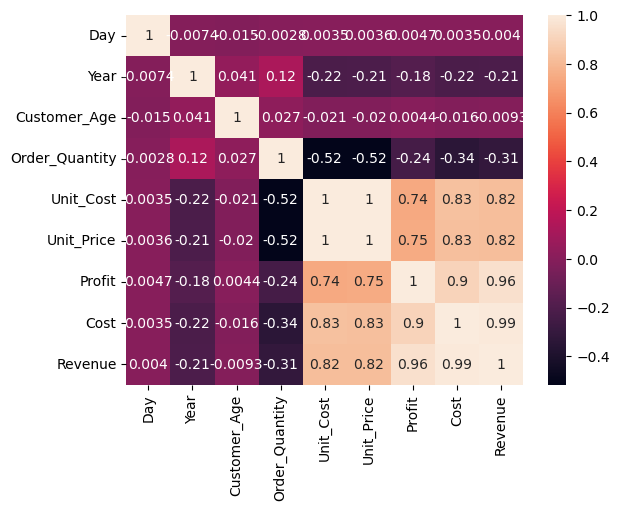

In [15]:
sns.heatmap(corr_data, cbar=True, annot=True)

Checking outliers

<AxesSubplot:xlabel='Profit', ylabel='Country'>

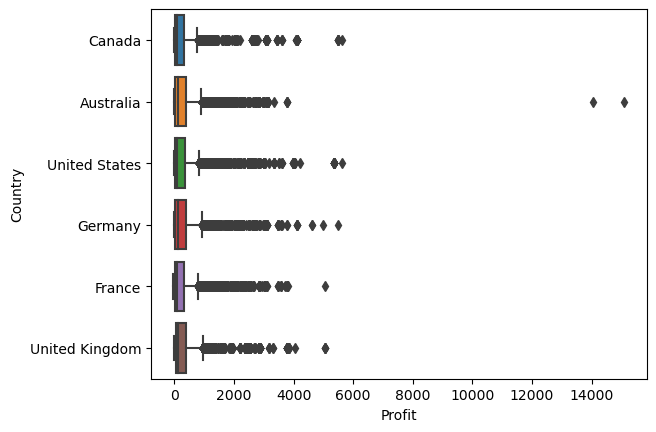

In [16]:
sns.boxplot(data=data, x="Profit", y="Country")

<AxesSubplot:ylabel='Profit'>

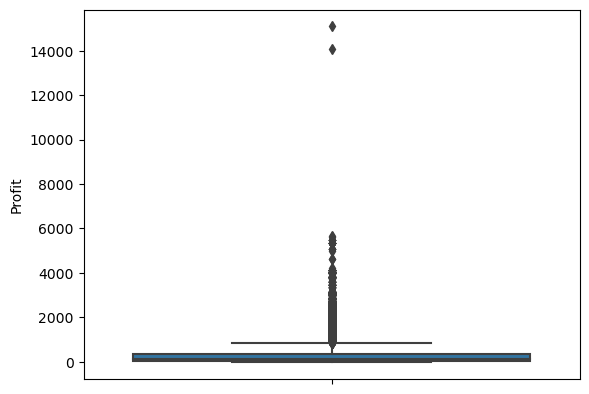

In [17]:
sns.boxplot(data=data, y="Profit")

<AxesSubplot:ylabel='Unit_Price'>

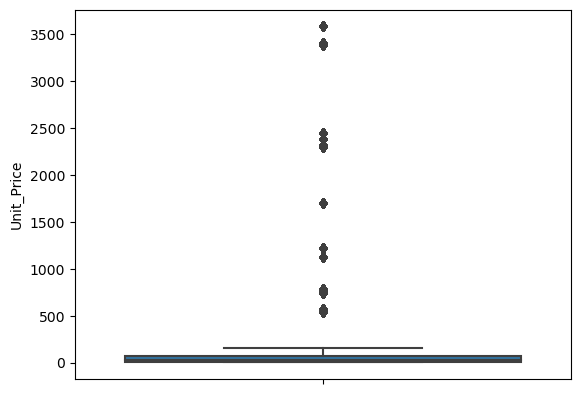

In [18]:
sns.boxplot(data=data, y="Unit_Price")

In [19]:
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt

In [24]:
num_bikes = data[['Customer_Age','Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit', 'Revenue']]
num_bikes.head(2)

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,19,8,45,120,590,950
1,19,8,45,120,590,950


Checking Distribution

Customer_Age
0.5239791308130209


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Order_Quantity
0.37826272123065996


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Unit_Cost
2.1081290126850485


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Unit_Price
2.0846213782861587


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Profit
4.0001070076271334


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Revenue
4.66927964396187


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


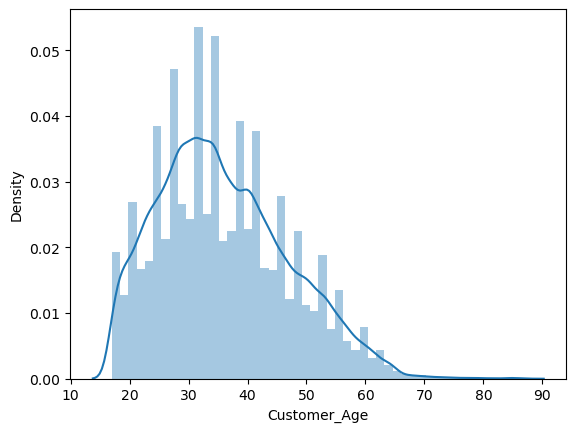

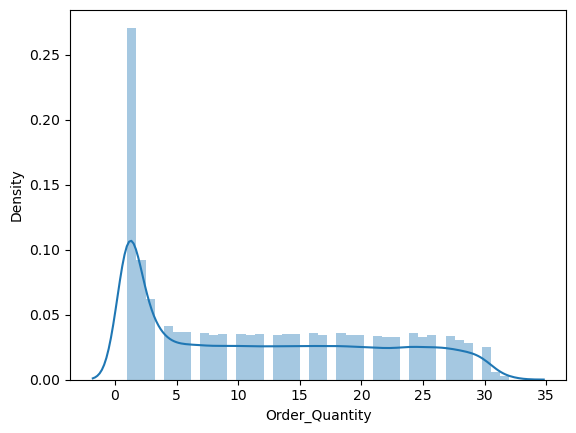

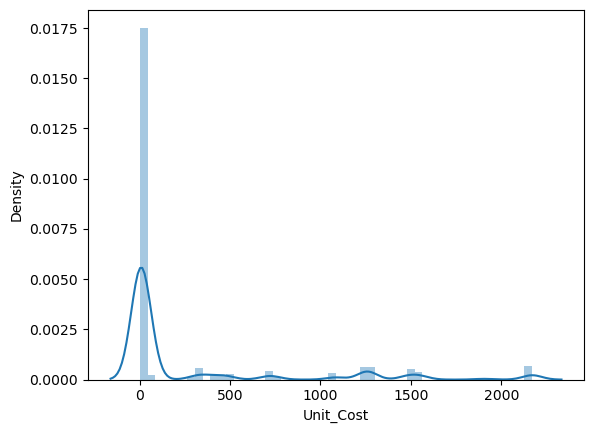

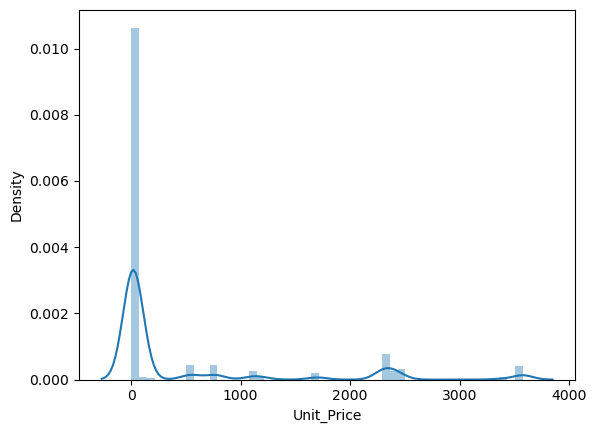

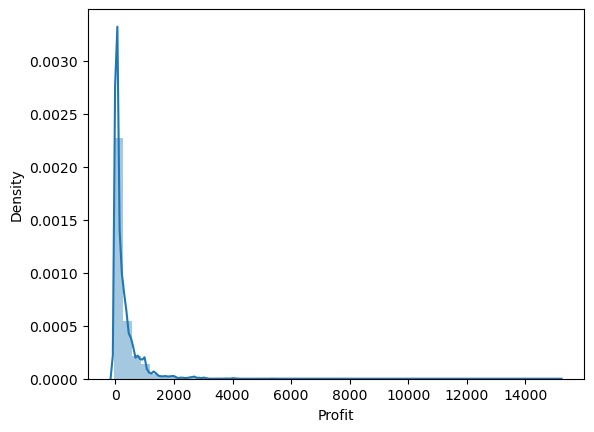

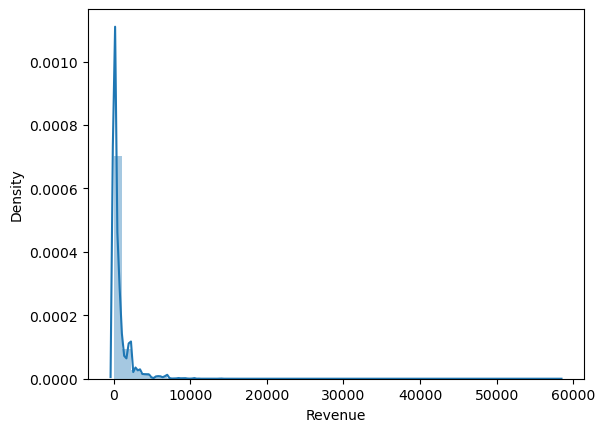

In [25]:
for col in num_bikes:
    print(col)
    print(skew(num_bikes[col]))
    
    plt.figure()
    sns.distplot(num_bikes[col])